In [987]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import linalg
from scipy.special import legendre,spherical_jn
import scipy.integrate as integrate
from numpy import math
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [988]:
# Parameter Setting
# c is the Bandwidth
# n is the order
# N is the order of approximation
N=24
c=0.5

In [989]:
def Prolate_Gen(c, n):
    N=24    #Approximant order
    T0=1
    A=[[0 for x in range(N)] for y in range(N)]
    for i in range(N):
        for j in range(N):
            if(i==j):
                k=i
                A[i][j]=k*(k+1)+(c*c)*(((2*k*(k+1))-1)/((2*k+3)*(2*k-1)))
            if(j==i+2):
                k=i
                A[i][j]=((k+1)*(k+2)*c*c)/((2*k+3)*np.sqrt((2*k+1)*(2*k+5)))
            if(i==j+2):
                k=j
                A[i][j]=((k+1)*(k+2)*c*c)/((2*k+3)*np.sqrt((2*k+1)*(2*k+5)))
    chi,beta=linalg.eig(A)
    #print(beta)
    #Eigenvalues should be sorted from lowest to highest and corresponding eigenvectors taken
    #These are eigenvalues of the differential equation,not of PSWF
    #beta=linalg.norm(beta)*beta
    idx=np.argsort(chi)
    chi=chi[idx]
    beta=beta[:,idx]
    print(chi)
    #print(beta)
    s1=0
    #Computing psi_0, we need beta_0
    for i in range(N):        
        s1=s1+np.poly1d(beta[i][n]*np.sqrt(i+0.5)*legendre(i))

    #print(beta[0][0]*np.sqrt(0+0.5)*legendre(0))
    #print(beta[0][1]*np.sqrt(1+0.5)*legendre(1))
    psi1=[]
    ax=[]
    for i in range(2000*T0):
        psi1.append(s1(-T0+(i/1000)))
        ax.append(-T0+(i/1000))
    plt.plot(ax,psi1)
    return s1,beta

[8.24148067e-02 2.14957049e+00 6.13157927e+00 1.21279846e+01
 2.01267344e+01 3.01261390e+01 4.21258068e+01 5.61256020e+01
 7.21254666e+01 9.01253724e+01 1.10125304e+02 1.32125253e+02
 1.56125214e+02 1.82125183e+02 2.10125159e+02 2.40125139e+02
 2.72125122e+02 3.06125109e+02 3.42125097e+02 3.80125088e+02
 4.20125079e+02 4.62125072e+02 5.06125107e+02 5.52125100e+02]


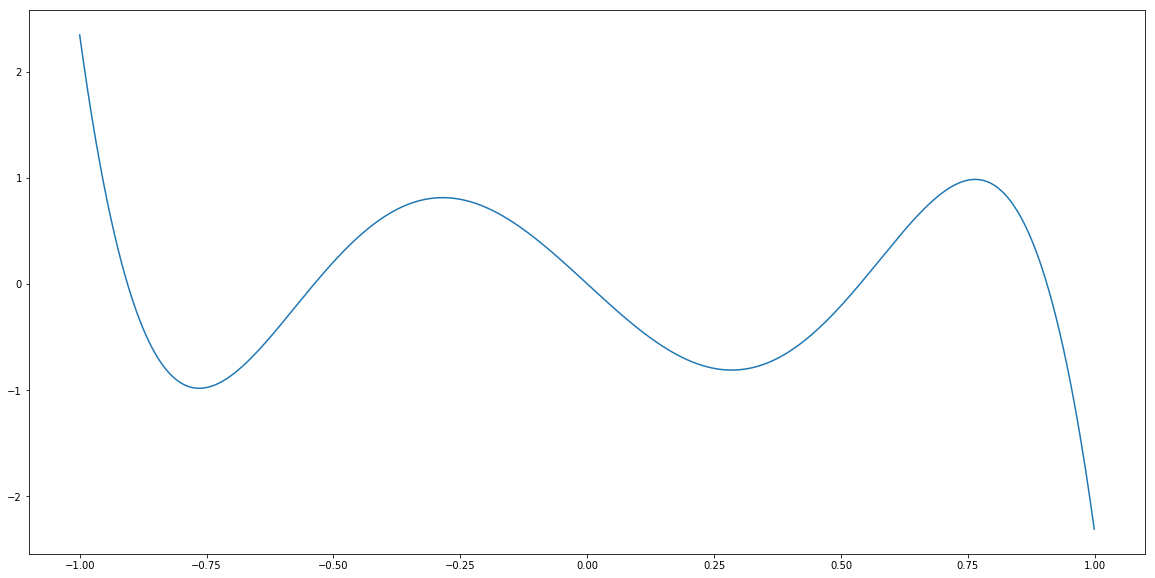

In [990]:
s1,beta1=Prolate_Gen(c,5)
## Bandwidth, Order
## PSF in [-1,-1] of the given bandwidth and order

In [991]:
#Compute eigenvalues of PSWF

In [992]:
#This computes eigenvalues only for even orders
def Eigen_finder(s1):
    pi=3.141592
    x0=0.1
    f1=lambda x:s1(x)*((np.sin((c)*(x-x0))/(pi*(x-x0))))
    f2=lambda x:s1(x)*((c)/pi)
    I1=integrate.quad(f1,-1,x0-0.0001)[0]
    I2=integrate.quad(f2,x0-0.0001,x0+0.0001)[0]
    I3=integrate.quad(f1,x0+0.0001,1)[0]
    eig_n=(I1+I2+I3)/s1(x0)
    return eig_n

In [993]:
eig_n=Eigen_finder(s1)
eig_n

5.0511718295973636e-14

In [994]:
def Orthogonal(s1,s2,eig_n1,eig_n2,beta1,beta2,N):
    N=24
    d0n1=[]
    d0n2=[]
    for i in range(N):
        d0n1.append(beta1[i][n]*np.sqrt(i+0.5))
        d0n2.append(beta2[i][n]*np.sqrt(i+0.5))
    Norm1=0
    Norm2=0
    for i in range(N):
        Norm1=Norm1+(1/(2*i+1))*d0n1[i]*d0n1[i]
        Norm2=Norm2+(1/(2*i+1))*d0n2[i]*d0n2[i]
    Norm1=2*Norm1
    Norm2=2*Norm2
    f=lambda x:np.sqrt(eig_n1/Norm1)*np.sqrt(eig_n2/Norm2)*s1(x)*s2(x)
    print(integrate.quad(f,-1,1)[0])
    return

[8.24148067e-02 2.14957049e+00 6.13157927e+00 1.21279846e+01
 2.01267344e+01 3.01261390e+01 4.21258068e+01 5.61256020e+01
 7.21254666e+01 9.01253724e+01 1.10125304e+02 1.32125253e+02
 1.56125214e+02 1.82125183e+02 2.10125159e+02 2.40125139e+02
 2.72125122e+02 3.06125109e+02 3.42125097e+02 3.80125088e+02
 4.20125079e+02 4.62125072e+02 5.06125107e+02 5.52125100e+02]
[8.24148067e-02 2.14957049e+00 6.13157927e+00 1.21279846e+01
 2.01267344e+01 3.01261390e+01 4.21258068e+01 5.61256020e+01
 7.21254666e+01 9.01253724e+01 1.10125304e+02 1.32125253e+02
 1.56125214e+02 1.82125183e+02 2.10125159e+02 2.40125139e+02
 2.72125122e+02 3.06125109e+02 3.42125097e+02 3.80125088e+02
 4.20125079e+02 4.62125072e+02 5.06125107e+02 5.52125100e+02]


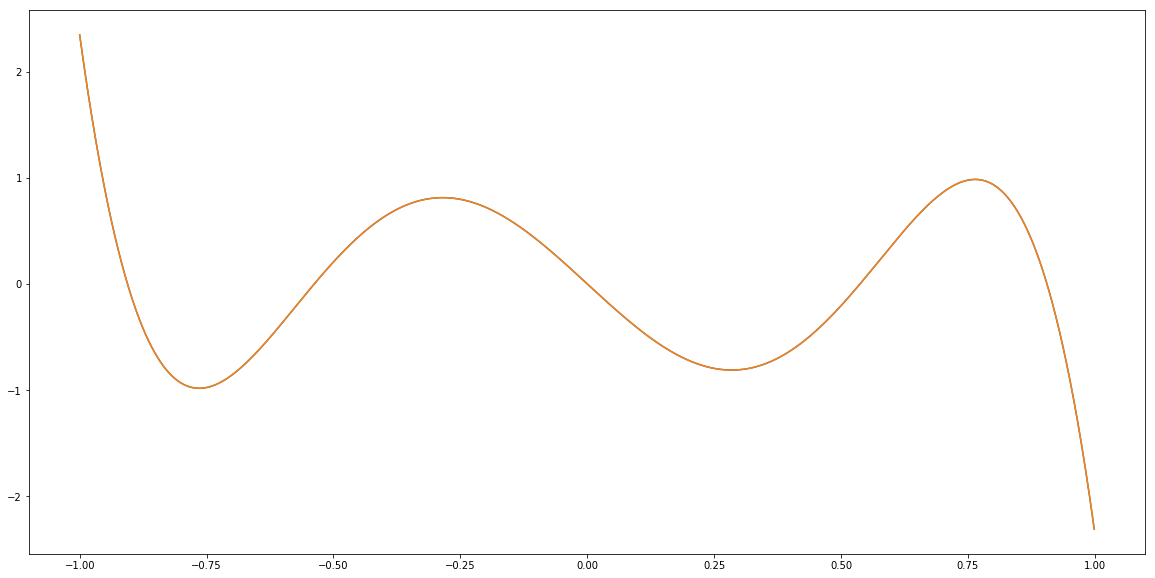

In [995]:
s1,beta1=Prolate_Gen(c,5)
s2,beta2=Prolate_Gen(c,5)
eig_n1=Eigen_finder(s1)
eig_n2=Eigen_finder(s2)

In [996]:
Orthogonal(s1,s2,eig_n1,eig_n2,beta1,beta2,N)

5.051171829597364e-14


In [997]:
def Infinte_Domain_PSWF(c,n,eig_n):
    pi=np.pi
    d0n=[]
    for i in range(N):
        if(n%2==0):
            scale=(((-1)**(n/2))*math.factorial(n))/(legendre(i)(1)*(2**n)*(math.factorial(n/2))*math.factorial(n/2))
        else:
            scale=(((-1)**((n-1)/2))*math.factorial(n+1))/(legendre(i)(1)*(2**n)*(math.factorial((n-1)/2))*math.factorial((n+1)/2))
        d0n.append(beta[i][n]*np.sqrt(i+0.5))
    Norm=0
    for i in range(N):
        if n%2==0 and i%2==0:
            Norm=Norm+(1/(2*i+1))*d0n[i]*d0n[i]
        elif n%2!=0 and i%2!=0:
            Norm=Norm+(1/(2*i+1))*d0n[i]*d0n[i]
        else:
            continue
    Norm=2*Norm
    if n%2==0:
        lambda_n=(2*c/pi)*((((d0n[0]*(2**n)*(math.factorial(n/2)**2)))/(math.factorial(n)))**2)
    else:
        lambda_n=(2*c/pi)*(((c*d0n[1]*(2**n)*math.factorial((n-1)/2)*math.factorial((n+1)/2))/(math.factorial(n+1)*3))**2)
    kn=0
    print(lambda_n)
    if n%2==0:
        kn=math.factorial(n)*(1/(d0n[0]*(2**n)*(math.factorial(n/2)**2)))
    else:
        kn=3*math.factorial(n+1)*(1/(c*d0n[1]*(2**n)*math.factorial((n-1)/2)*math.factorial((n+1)/2)))
    tspan=10
    Psi_inf1=[]
    J=[]
    j=0
    i=0
    for i in range(2000*tspan):
        j=(i/1000)-tspan
        sum=0
        for z in range(N):
            if z%2==0 and n%2==0:
                sum=sum+d0n[z]*spherical_jn(z,abs(c*j))*((-1)**((z-n)/2))
            elif z%2!=0 and n%2!=0:
                sum=sum+d0n[z]*spherical_jn(z,abs(c*j))*((-1)**((z-n)/2))
            else:
                continue
        if j<0 and n%2!=0:
            Psi_inf1.append(-sum*kn*np.sqrt(lambda_n/Norm))          #not normalized by np.sqrt(eig_n/Norm)
        elif j>0 and n%2!=0:
            Psi_inf1.append(sum*kn*np.sqrt(lambda_n/Norm))
        else:
            Psi_inf1.append(sum*kn*np.sqrt(lambda_n/Norm))
        J.append(j)
    plt.plot(J,Psi_inf1)
    return Psi_inf1,J

0.00010425632120502535


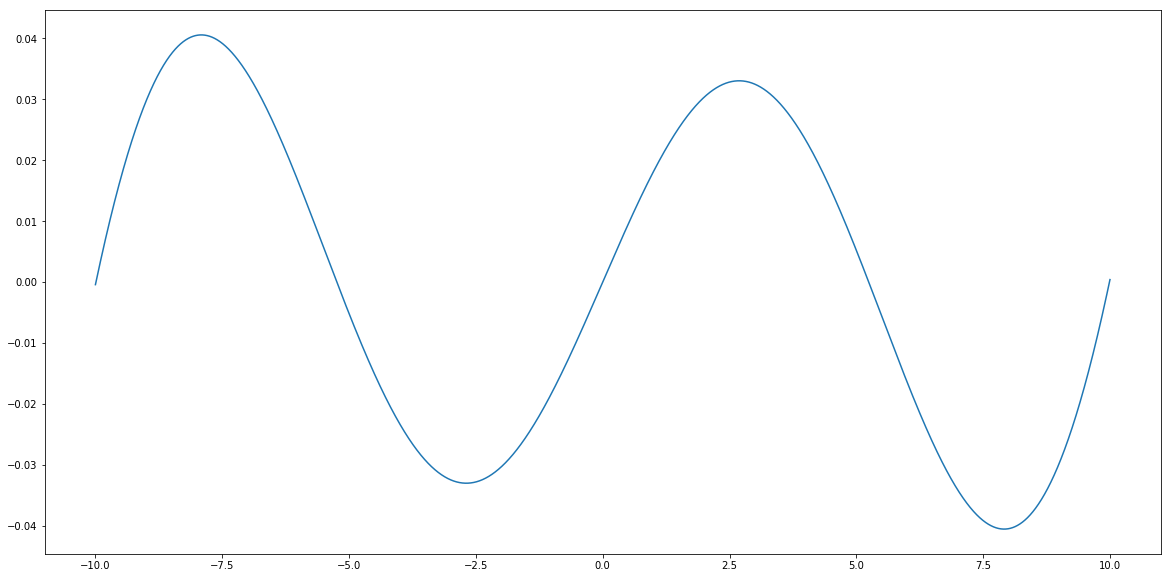

In [998]:
Psi_inf1,J=Infinte_Domain_PSWF(c,5,eig_n1)

In [999]:
Psi_inf1

[-0.0004325509974494583,
 -0.00039304528430042333,
 -0.0003535572930711824,
 -0.0003140870280510804,
 -0.00027463449352521494,
 -0.0002351996937739974,
 -0.00019578263307362247,
 -0.0001563833156956026,
 -0.00011700174590716383,
 -7.763792797115614e-05,
 -3.8291866145923874e-05,
 1.0364353146352064e-06,
 4.034697216123693e-05,
 7.963974014855627e-05,
 0.00011891473503597908,
 0.00015817195258778169,
 0.00019741138857194956,
 0.00023663303876109062,
 0.000275836898932682,
 0.00031502296486812445,
 0.00035419123235360837,
 0.00039334169717957835,
 0.00043247435514096294,
 0.0004715892020370696,
 0.0005106862336719366,
 0.0005497654458538082,
 0.000588826834395089,
 0.0006278703951134621,
 0.0006668961238301342,
 0.0007059040163714172,
 0.0007448940685676724,
 0.0007838662762540867,
 0.0008228206352696748,
 0.0008617571414586874,
 0.0009006757906692471,
 0.0009395765787540572,
 0.0009784595015706397,
 0.0010173245549803243,
 0.0010561717348492924,
 0.0010950010370481941,
 0.00113381245745

In [1000]:
def coeff(poly):
    coeff0=lambda x:np.sinc(x)*poly(x)
    I=integrate.quad(coeff0,-1,1)[0]
    return I

[8.24148067e-02 2.14957049e+00 6.13157927e+00 1.21279846e+01
 2.01267344e+01 3.01261390e+01 4.21258068e+01 5.61256020e+01
 7.21254666e+01 9.01253724e+01 1.10125304e+02 1.32125253e+02
 1.56125214e+02 1.82125183e+02 2.10125159e+02 2.40125139e+02
 2.72125122e+02 3.06125109e+02 3.42125097e+02 3.80125088e+02
 4.20125079e+02 4.62125072e+02 5.06125107e+02 5.52125100e+02]
[8.24148067e-02 2.14957049e+00 6.13157927e+00 1.21279846e+01
 2.01267344e+01 3.01261390e+01 4.21258068e+01 5.61256020e+01
 7.21254666e+01 9.01253724e+01 1.10125304e+02 1.32125253e+02
 1.56125214e+02 1.82125183e+02 2.10125159e+02 2.40125139e+02
 2.72125122e+02 3.06125109e+02 3.42125097e+02 3.80125088e+02
 4.20125079e+02 4.62125072e+02 5.06125107e+02 5.52125100e+02]
[8.24148067e-02 2.14957049e+00 6.13157927e+00 1.21279846e+01
 2.01267344e+01 3.01261390e+01 4.21258068e+01 5.61256020e+01
 7.21254666e+01 9.01253724e+01 1.10125304e+02 1.32125253e+02
 1.56125214e+02 1.82125183e+02 2.10125159e+02 2.40125139e+02
 2.72125122e+02 3.0612

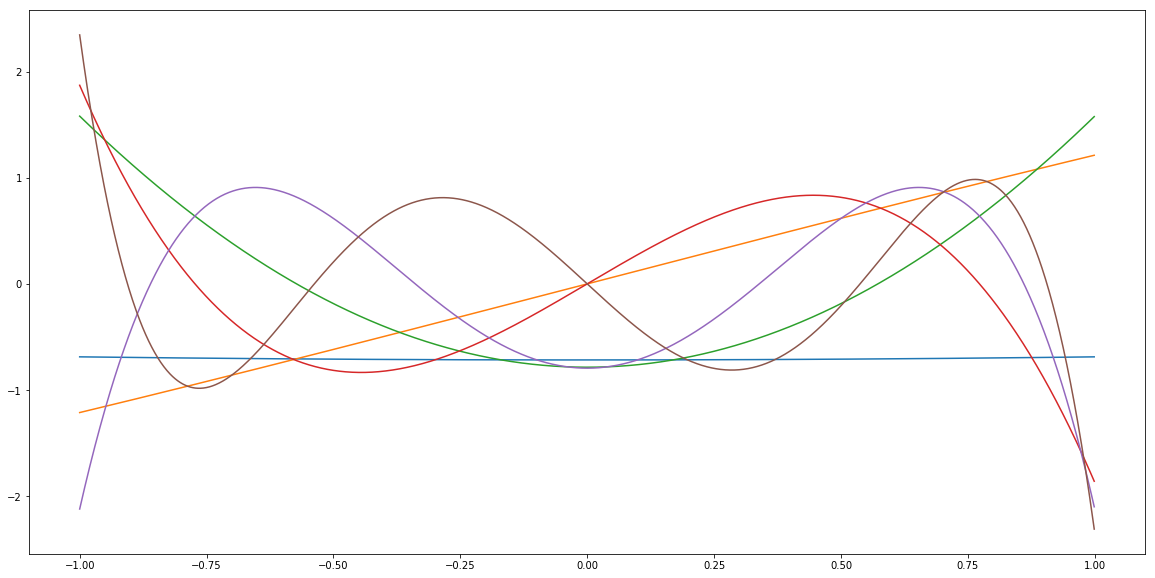

In [1001]:
p0,b0=Prolate_Gen(c,0)
p1,b1=Prolate_Gen(c,1)
p2,b2=Prolate_Gen(c,2)
p3,b3=Prolate_Gen(c,3)
p4,b4=Prolate_Gen(c,4)
p5,b5=Prolate_Gen(c,5)

In [1002]:
I0=coeff(p0)
I1=coeff(p1)
I2=coeff(p2)
I3=coeff(p3)
I4=coeff(p4)
I5=coeff(p5)

In [1003]:
p2

poly1d([ 1.15574561e-27,  2.56627078e-43, -2.31766987e-24, -1.23180997e-41,
        3.83899471e-21,  3.73454752e-37, -5.16111125e-18,  3.42662552e-33,
        5.49340492e-15, -3.02474187e-30, -4.48468181e-12,  1.47782839e-27,
        2.69244792e-09, -5.93038112e-25, -1.12100916e-06,  1.19592871e-22,
        2.96325694e-04,  4.90841114e-22, -4.27660448e-02, -4.67051436e-18,
        2.40794909e+00, -2.35165160e-18, -7.85425413e-01])

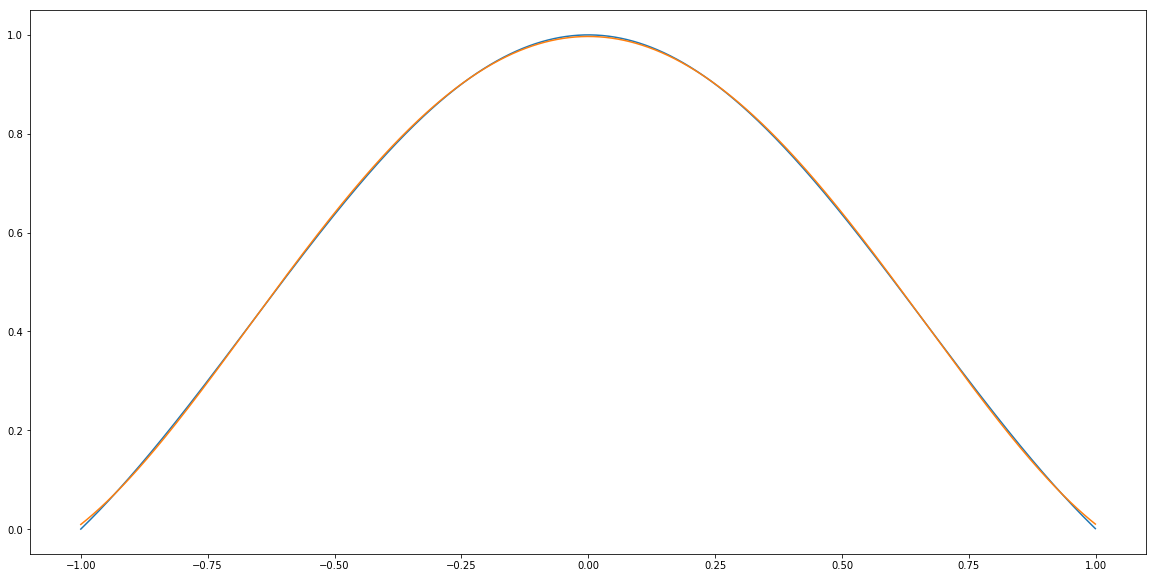

In [1004]:
x=[]
sinc_org=[]
sinc_reconstr=[]
for i in range(2000):
    x.append(-1+(i/1000))
    sinc_org.append(np.sinc(-1+(i/1000)))
    sinc_reconstr.append(I0*p0(-1+(i/1000))+I1*p1(-1+(i/1000))+I2*p2(-1+(i/1000))+I3*p3(-1+(i/1000))+I4*p4(-1+(i/1000)))
plt.plot(x,sinc_org)
plt.plot(x,sinc_reconstr)
    #plt.plot(coeff0*s1(x))

In [1005]:
k=(np.sum(np.array(sinc_org)**2)-np.sum(np.array(sinc_reconstr)**2))/np.sum(np.array(sinc_org)**2)*100
k

0.0016221384514237245

In [1006]:
prod=[]
for i in range(len(J)):
    prod.append(Psi_inf1[i]*Psi_inf1[i])
np.trapz(prod,J)   

0.013641779401302935

In [1007]:

def coeff_inf(Psi_inf,J):
    product=[]
    for i in range(len(J)):
          product.append(Psi_inf[i]*np.sinc(J[i]))
    return np.trapz(product,J)


0.11086677125574118
0.007762629831526164
0.16547322177019896
0.0022806719291882122
0.04861788781116628
0.00010425632120502535


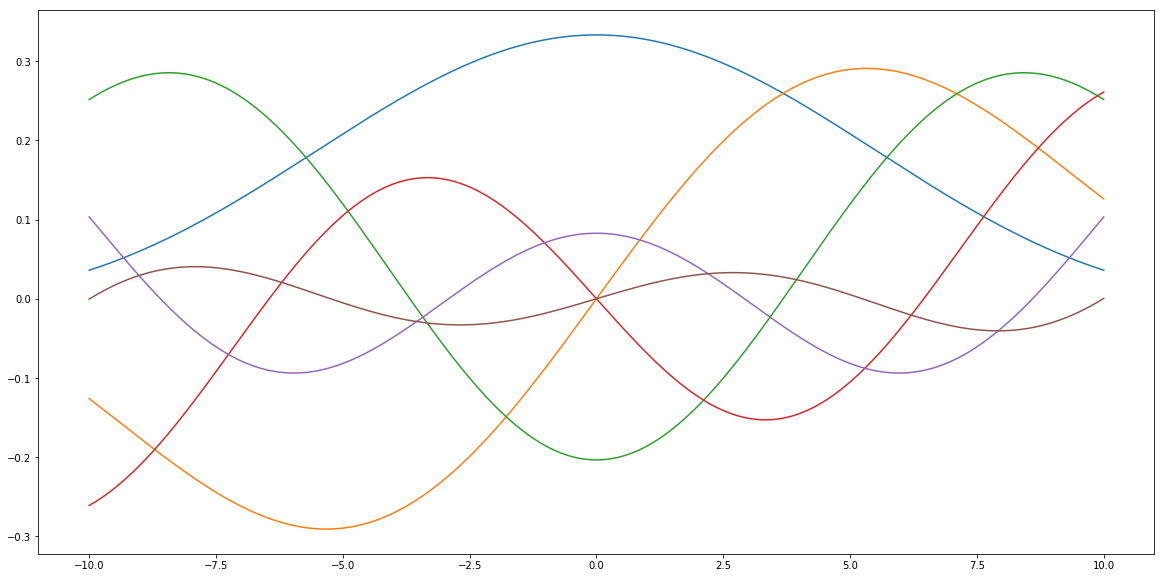

In [1008]:
eig_n0=Eigen_finder(p0)
eig_n1=Eigen_finder(p1)
eig_n2=Eigen_finder(p2)
eig_n3=Eigen_finder(p3)
eig_n4=Eigen_finder(p4)
eig_n5=Eigen_finder(p5)

Psi_inf0,J=Infinte_Domain_PSWF(c,0,eig_n0)
Psi_inf1,J=Infinte_Domain_PSWF(c,1,eig_n1)
Psi_inf2,J=Infinte_Domain_PSWF(c,2,eig_n2)
Psi_inf3,J=Infinte_Domain_PSWF(c,3,eig_n3)
Psi_inf4,J=Infinte_Domain_PSWF(c,4,eig_n4)
Psi_inf5,J=Infinte_Domain_PSWF(c,5,eig_n5)

In [1009]:
cinf0=coeff_inf(Psi_inf0,J)
cinf1=coeff_inf(Psi_inf1,J)
cinf2=coeff_inf(Psi_inf2,J)
cinf3=coeff_inf(Psi_inf3,J)
cinf4=coeff_inf(Psi_inf4,J)
cinf5=coeff_inf(Psi_inf5,J)

In [1010]:
Y=[]
y0=list(map(lambda x: x * cinf0, Psi_inf0))
y1=list(map(lambda x: x * cinf1, Psi_inf1))
y2=list(map(lambda x: x * cinf2, Psi_inf2))
y3=list(map(lambda x: x * cinf3, Psi_inf3))
y4=list(map(lambda x: x * cinf4, Psi_inf4))
y5=list(map(lambda x: x * cinf5, Psi_inf5))
for i in range(len(y0)):
    Y.append(y0[i]+y1[i]+y2[i]+y3[i]+y4[i]+y5[i])

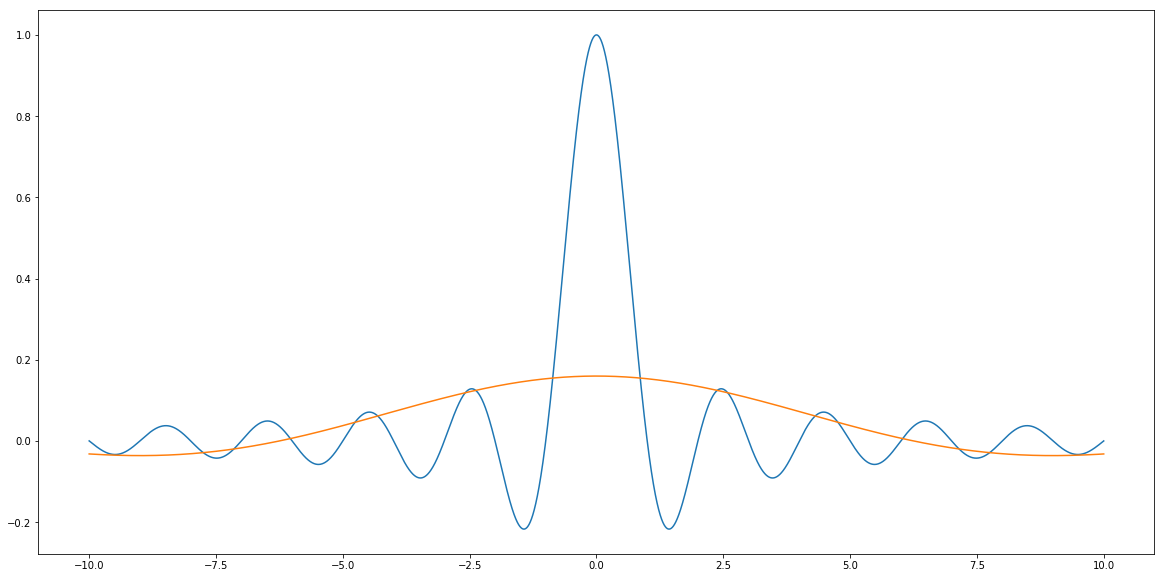

In [1011]:
#### x=[]
sinc_org=[]
sinc_reconstr=[]
for i in range(len(J)):
    sinc_org.append(np.sinc(J[i]))
plt.plot(J,sinc_org)
plt.plot(J,Y)
    #plt.plot(coeff0*s1(x))

In [1012]:
## Energy Loss for infinite
k=(np.sum(np.array(sinc_org)**2)-np.sum(np.array(Y)**2))/np.sum(np.array(sinc_org)**2)*100

In [1013]:
k

84.78623225054629